**Implementation of Multi Layer Perceptron from Scratch**

An MLP(2 hidden layered) for classifying MNIST digits

**Derivation of the weight update equation for W in form of Matrix operations**   
1. input-X 
2. weights-W,V 
3. Z=XW and the activation a=tanh(Z)
4. O=aV and the final output after activation y^=softmax(O)
5. LOSS(L) = summation over batch(-Ylog(y^)

***without matrix multiplication***
\begin{eqnarray}
By\;the\;chain\;rule,\; we\; have\\
\frac{\partial L}{\partial W}&=\frac{\partial L}{\partial a} .\frac{\partial a}{\partial Z} .\frac{\partial Z}{\partial W} \\
1. \frac{\partial L}{\partial a}&= \frac{\partial L}{\partial O}.\frac{\partial 
O}{\partial a}=((y^-)-Y).V\\
 2. \frac{\partial a}{\partial Z}&= \frac{\partial tanh(Z)}{\partial Z}=1-a^2\\
 3. \frac{\partial Z}{\partial W}&= X\\
 \frac{\partial L}{\partial W}&=((y^- - Y)V(1-a^2)(X)\\
 \end{eqnarray}
 **With matrix multiplication and to match the dimensions of LHS AND RHS**
\begin{eqnarray}
\frac{\partial L}{\partial W}&=(X^T.((y^- - Y).V * (1-a^2)))^T
\end{eqnarray}

                                              where * is the "hadam product" and a^2 is element wise square of matrix.

Started calculating Training error in 5 Trails for each epoch with Batch size = 25 
Started calculating Validation error in 5 Trails for each epoch with Batch size = 25 
Training Error for 100th epoch for Trail Number : 1
Training Error for 100th epoch for Trail Number : 2
Training Error for 100th epoch for Trail Number : 3
Training Error for 100th epoch for Trail Number : 4
Training Error for 100th epoch for Trail Number : 5


Final Training Errors after 5 trails and 100 Epocs : 
[1.9230259717974285, 1.4179830698665852, 1.137957798551315, 0.9688121763720159, 0.8572264118262908, 0.7780742989313439, 0.7187437092821662, 0.6723773765125786, 0.6349661907114056, 0.6040179174920133, 0.5779018770827099, 0.5555043656143677, 0.5360368185349941, 0.5189236237596692, 0.5037336427738608, 0.4901368036089357, 0.47787564933092397, 0.46674612484196526, 0.45658425264626623, 0.44725667071625796, 0.4386537692692399, 0.4306846177976738, 0.42327315179017894, 0.4163552630813126, 0.4098765498557634, 0.4037905

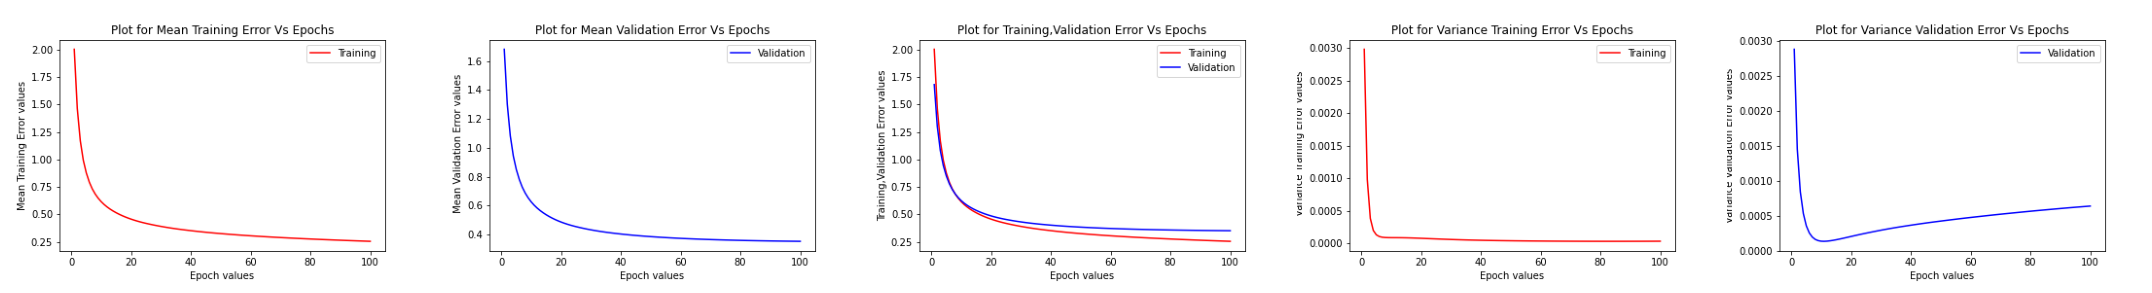

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Dimension of all the Matrices Used
# W - H * D+1   -- Weights from Input layer to Hidden layer
# V - K * H+1   -- Weights from Hidden layer to Output layer
# X - N * D+1   -- Weights of Input data
# Y - N * K     -- Weights of Output label data
# Z - H+1 * 1   -- Hidden layer Weights
# O - K * 1     -- Output layer weights


# Function to read data and store it in form of 2D array
def read_data(file_name) :
    data = np.loadtxt(file_name, delimiter=',')
    return data


# Implementation of Forward pass function
def forward_pass(data_points,W,V,Y) :
    Z=compute_Z_values(W,data_points)
    O_softmax=compute_O_values(V,Z)
    error=calculate_error(O_softmax,Y)
    return error,O_softmax


# Implementation of Cross Entropy Error Function takes as input O_softmax, Y
def calculate_error(predictions, targets, epsilon=1e-10):
    n_samples = targets.shape[0]
    logp = - np.log(predictions[np.arange(n_samples), targets.argmax(axis=1)])
    loss = np.sum(logp)/n_samples
    return loss


# Implementation of Softmax Error Function takes as input O
def compute_softmax(output_matrix) :
    y_length = 10
    n,m=output_matrix.shape
    output_matrix=output_matrix.astype(float)
    for i in range(n):
      output_matrix[i]=np.exp(output_matrix[i]) / np.sum(np.exp(output_matrix[i]), axis=0)
    return output_matrix


# Implementation of Backward pass using Backpropagation Algorithm to calculate V_new, W_new, bias_v
def backward_pass(O_softmax,Y,V,Z,W,X,bias_z):
    W_new=gradient_input_to_hidden(O_softmax,Y,V,Z,X)
    V_new,bias_v=gradient_hidden_to_output(O_softmax,Y,Z,bias_z)
    return  W_new,V_new,bias_v


#Implementation of Graident back propogation from Hidden to Input Layer
def gradient_hidden_to_output(O_softmax,Y,Z,bias_z) :
    final_result_matrix=np.matmul((O_softmax-Y).T,Z)
    bias_v=np.matmul((O_softmax-Y).T,bias_z)
    return final_result_matrix,bias_v

#Implementation of Graident back propogation from Input to Hidden Layer
def gradient_input_to_hidden(O_softmax,Y,V,Z,X) :
    x,y=X.shape
    data=X
    if(y!=401):
     col=np.ones(shape=(x,1))
     data=np.append(col,X,axis=1)
    v_nobias=V[:,1:]
    a=np.matmul(O_softmax-Y,v_nobias)
    z1=np.square(Z)
    z1=np.subtract(1,z1)
    a=np.multiply(z1,a)
    result_matrix=np.matmul(data.T,a)
    return result_matrix.T

# Function to calculate Z values during forward pass
def compute_Z_values(weights,data_points) :
    x,y=data_points.shape
    data=data_points
    if(y!=401):
     col=np.ones(shape=(x,1))
     data=np.append(col,data_points,axis=1)
    z_values=np.matmul(data,np.transpose(weights))
    z_values=np.tanh(z_values)
    # appending the extra column for bias
    return z_values


# Function to Calculate output matrix during forward pass
def compute_O_values(weights,z_values) :
    n,m=z_values.shape
    if(m!=501):
     col=np.ones(shape=(n,1))
     z_val=np.append(col,z_values,axis=1)
    o_values=np.matmul(z_val,np.transpose(weights))
    o_values=compute_softmax(o_values)
    return o_values



# Function to Intialise weights with bias term
def initilaise_weights(data) :
    # function to append bias term.
    # insert code here
    n,m=data.shape
    col=np.ones(shape=(n,1))#append bias column
    data=np.append(col,data,axis=1)
    return data

# To intiliase random weights to Matrices such as W, V
def random_weights(number_of_rows,number_of_columns) :
    new_data=np.random.randn(number_of_rows,number_of_columns)*np.sqrt(2/number_of_columns)
    return new_data


# To divide the data into test train data
def train_test_splitt(X,Y,fraction) :
     data_train_x, data_test_x, data_train_y, data_test_y= train_test_split(X, Y, test_size=0.2, random_state=1)
     data_train_x, validation_data_x, data_train_y, validation_data_y= train_test_split(data_train_x, data_train_y, test_size=0.2, random_state=1)
     return data_train_x,data_train_y,validation_data_x,validation_data_y,data_test_x,data_test_y



def shuffled(a, b, seed):
   a,b = shuffle(a,b,random_state=seed)
   return a,b


if __name__ == "__main__" :
    data = read_data("/content/data.txt")
    Y = read_data("/content/label.txt")
    X = initilaise_weights(data)
    W = random_weights(500,401)
    V = random_weights(10,501)
    Z = compute_Z_values(W,X[:25,:])
    O = compute_O_values(V,Z)
    bias_z = np.empty(shape=(25, 1))
    bias_z.fill(1.0)
    i =0
    learning_rate = 0.01
    train_test_fraction  = 0.8
    train_validation_split = 0.2
    train_data_x,train_data_y,validation_data_x,validation_data_y,test_data_x,test_data_y =train_test_splitt(X,Y,train_test_fraction)
    number_of_epocs=100
    train_error_epoch = []*(5*number_of_epocs)
    train_data_len = 3200
    validation_data_len = 800
    test_data_len =1000
    validation_error_epoch = [] * (5*number_of_epocs)
    # Running for 5 trails using 100 Epocs and Batch size = 25
    batch_size = 25
    print("Started calculating Training error in 5 Trails for each epoch with Batch size = 25 ")
    print("Started calculating Validation error in 5 Trails for each epoch with Batch size = 25 ")
    # Different trails are performed for 5 times.
    # 5 different trails
    for k in range(5) :
        W = random_weights(500, 401)
        V = random_weights(10, 501)
        error_train=0
        error_validation = 0
        # Randomising the data
        seed = random.randint(10000,10000000)
        X,Y = shuffled(X,Y,seed)
        print("Training Error for 100th epoch for Trail Number : "+str(k+1))
        for j in range(number_of_epocs) :
            i=0
            count=0
            error_train = 0.0
            error_validation = 0.0
            #X,Y = shuffled(X,Y,1234)
            while i < (train_data_len)  :
                i1=i
                # Batch size is 25
                i= i+25
                error,O_softmax=forward_pass(X[i1:i, :], W, V, Y[i1:i, :])
                W_new,V_new,bias_v=backward_pass(O_softmax,Y[i1:i,:],V,Z,W,X[i1:i,:],bias_z)
                W = W - (learning_rate/25)*W_new
                V_new = np.append(learning_rate*bias_v,V_new,axis=1)
                V = V - (learning_rate/25)*V_new
                error_train+= error
                count+=1
            error, O_softmax = forward_pass(X[0:3200, :], W, V, Y[0 : 3200, :])
            error1, O_softmax = forward_pass(X[3200:4000, :], W, V, Y[3200:4000, :])
            error_validation = error1
            count = train_data_len/batch_size
            count1= validation_data_len/batch_size
            error_train = error_train/count
            train_error_epoch.append(error_train)
            validation_error_epoch.append(error_validation)
    print("\n")
    print("Final Training Errors after 5 trails and 100 Epocs : ")
    print(train_error_epoch)
    print("\n")
    print("Final Validation Errors after 5 trails and 100 Epocs : ")
    print(validation_error_epoch)
    mean_training = []
    variance_training = []
    mean_validation = []
    variance_validation = []
    train_error_epoch = np.reshape(train_error_epoch,(5,number_of_epocs))
    validation_error_epoch = np.reshape(validation_error_epoch,(5,number_of_epocs))
    #averaging over 5 runs
    mean_training = np.mean(train_error_epoch, axis=0)
    mean_validation = np.mean(validation_error_epoch,axis=0)
    variance_training = np.var(train_error_epoch,axis=0)
    variance_validation = np.var(validation_error_epoch,axis=0)
    mean_training = np.reshape(mean_training,(number_of_epocs,))
    mean_validation = np.reshape(mean_validation, (number_of_epocs))
    variance_training = np.reshape(variance_training,(number_of_epocs,))
    variance_validation = np.reshape(variance_validation,(number_of_epocs,))
    epochs = []
    for i in range(1,number_of_epocs+1) :
        epochs.append(i)
    print("\n")
    print("Plots are started to Generate In current directory / : ")
    plt.plot(epochs,mean_training, color='red', label='Training')
    plt.xlabel("Epoch values")
    plt.plot(epochs, mean_validation,color='blue', label='Validation')
    plt.ylabel("Training,Validation Error values")
    plt.title("Plot for Training,Validation Error Vs Epochs")
    plt.legend(loc='best')
    location = "/lab3.a_TrainingAndValidationError" + ".png"
    plt.savefig(location)
    plt.close()
    plt.plot(epochs, mean_training, color='red', label='Training')
    plt.xlabel("Epoch values")
    plt.ylabel("Mean Training Error values")
    plt.title("Plot for Mean Training Error Vs Epochs")
    location = "/lab3.a_MeanTrainingError" + ".png"
    plt.legend(loc='best')
    plt.savefig(location)
    plt.close()
    #plt.ylim(0.0133, 0.134)
    plt.plot(epochs, mean_validation, color='blue', label='Validation')
    plt.xlabel("Epoch values")
    plt.ylabel(" Mean Validation Error values")
    plt.title("Plot for Mean Validation Error Vs Epochs")
    location = "/lab3.a_MeanValidationError" + ".png"
    plt.legend(loc='best')
    plt.savefig(location)
    plt.close()
    #plt.ylim(0.000240, 0.000242)
    plt.plot(epochs, variance_training, color='red', label='Training')
    plt.xlabel("Epoch values")
    plt.ylabel(" Variance Training Error values")
    plt.title("Plot for Variance Training Error Vs Epochs")
    location = "/lab3.a_VarianceTrainingError" + ".png"
    plt.legend(loc='best')
    plt.savefig(location)
    plt.close()
    #plt.ylim(0.000210, 0.000211)
    plt.plot(epochs,variance_validation, color='blue', label='Validation')
    plt.xlabel("Epoch values")
    plt.ylabel("Variance Validation Error values")
    plt.title("Plot for Variance Validation Error Vs Epochs")
    location = "/lab3.a_VarianceValidationError" + ".png"
    plt.legend(loc='best')
    plt.savefig(location)
    plt.close()
    print("\n")
    print("Plots are Generated Successfully In current directory /")

    def plotImages(images_arr):
     fig, axes = plt.subplots(1, 5, figsize=(30,30))
     axes = axes.flatten()
     for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
     plt.tight_layout()
     plt.show()

    x1=plt.imread("/lab3.a_VarianceValidationError.png")
    x2=plt.imread("/lab3.a_MeanTrainingError.png")
    x3=plt.imread("/lab3.a_VarianceTrainingError.png")
    x6=plt.imread("/lab3.a_TrainingAndValidationError.png")
    x7=plt.imread("/lab3.a_MeanValidationError.png")
    x=[]
    x.append(x2)
    x.append(x7)
    x.append(x6)
    x.append(x3)
    x.append(x1)
    plotImages(x)